<a href="https://colab.research.google.com/github/theodelano-github/theodelano-github/blob/main/rolle_colab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# what if the values are not nan and it is outliers

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# data preparation

In [3]:
df = pd.read_csv('cc2.csv')
df.columns

Index(['row', 'col', 'rep', 'line', 'grid', 'irrigation', 'Row',
       'Weight per row (lbs)', 'cc_0412', 'cc_0415', 'cc_0427', 'cc_0506',
       'cc_0516', 'cc_0520', 'cc_0523', 'cc_0527', 'cc_0531', 'cc_0602',
       'cc_0607', 'cc_0614', 'cc_0617', 'cc_0620', 'cc_0623', 'cc_0627',
       'cc_0630', 'cc_0708', 'cc_0713', 'cc_0716', 'cc_0719', 'cc_0721',
       'cc_0725', 'cc_0728', 'cc_0802', 'cc_0808', 'cc_0812'],
      dtype='object')

In [71]:
print(df.columns)
# Get the exact column names from the DataFrame
columns_to_keep = ['Weight per row (lbs)', 'cc_0412', 'cc_0415', 'cc_0427', 'cc_0506',
       'cc_0516', 'cc_0520', 'cc_0523', 'cc_0527', 'cc_0531', 'cc_0602',
       'cc_0607', 'cc_0614', 'cc_0617', 'cc_0620', 'cc_0623', 'cc_0627',
       'cc_0630', 'cc_0708', 'cc_0713', 'cc_0716', 'cc_0719', 'cc_0721',
       'cc_0725', 'cc_0728', 'cc_0802', 'cc_0808', 'cc_0812']

# Ensure all columns to keep are in the dataframe before filtering
missing_cols = [col for col in columns_to_keep if col not in df.columns]
if missing_cols:
    print(f"The following columns are missing from the DataFrame: {missing_cols}")
else:
    df = df[columns_to_keep]
    print("DataFrame filtered successfully.")

df

Index(['row', 'col', 'rep', 'line', 'grid', 'irrigation', 'Row',
       'Weight per row (lbs)', 'cc_0412', 'cc_0415', 'cc_0427', 'cc_0506',
       'cc_0516', 'cc_0520', 'cc_0523', 'cc_0527', 'cc_0531', 'cc_0602',
       'cc_0607', 'cc_0614', 'cc_0617', 'cc_0620', 'cc_0623', 'cc_0627',
       'cc_0630', 'cc_0708', 'cc_0713', 'cc_0716', 'cc_0719', 'cc_0721',
       'cc_0725', 'cc_0728', 'cc_0802', 'cc_0808', 'cc_0812'],
      dtype='object')
DataFrame filtered successfully.


,Weight per row (lbs),cc_0412,cc_0415,cc_0427,cc_0506,cc_0516,cc_0520,cc_0523,cc_0527,cc_0531,...,cc_0708,cc_0713,cc_0716,cc_0719,cc_0721,cc_0725,cc_0728,cc_0802,cc_0808,cc_0812
0,3.780,0.081568,NaN,0.506667,0.673716,14.172633,16.969178,34.136392,46.896722,61.735096,...,88.205059,95.142249,97.508155,95.755090,93.039407,87.399581,90.716689,71.085950,43.122621,2.161944
1,6.520,0.186077,0.012533,NaN,1.353307,32.203893,39.788772,52.741367,64.031636,77.997307,...,93.136481,97.695084,99.125388,97.005323,93.538342,80.589630,84.889585,57.892665,29.066069,0.582856
2,5.860,0.661464,0.134284,5.517654,2.679195,NaN,47.496274,59.823817,69.709963,80.347351,...,95.653768,99.558789,99.967329,99.168135,96.778720,88.793139,92.063589,69.637483,38.082146,0.873887
3,5.680,0.336467,0.044761,1.549694,2.653735,NaN,45.643148,57.256623,71.006852,81.622227,...,95.809015,97.526391,99.262519,96.541733,90.696649,73.390052,80.839203,52.699078,27.300706,0.902222
4,6.280,0.067548,0.016114,0.807326,1.306303,33.111192,41.835922,51.598181,64.158216,75.900381,...,92.466525,97.646630,99.228045,94.780455,91.092250,70.627109,76.937257,42.302940,15.922434,0.485934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,7.626,0.031862,0.000000,0.786911,0.924401,15.590939,20.229968,36.292305,37.691925,42.252025,...,79.475825,80.767407,79.451998,84.502990,79.786400,83.738646,80.157685,66.646610,49.739201,44.095292
871,1.234,0.011470,0.000000,0.012991,0.023502,0.873927,1.403704,1.837501,9.795503,8.761577,...,61.842315,57.310035,58.544424,62.020694,63.403290,72.280893,73.066935,71.067630,59.197796,55.037420
872,4.718,0.038235,0.021485,0.796190,1.402269,14.917244,22.164268,32.608458,39.543988,44.272319,...,68.636697,69.942308,66.401522,71.197589,68.769732,71.279806,70.182102,63.230085,50.960349,44.047626
873,7.244,0.183528,0.057294,4.224077,5.070494,30.720929,39.224518,50.645157,52.332993,56.719192,...,88.619744,87.490921,84.471470,87.125742,84.809680,87.250982,84.833437,73.768497,62.861240,61.191705


In [4]:
y = df['Weight per row (lbs)']
print(y)

0      3.780
1      6.520
2      5.860
3      5.680
4      6.280
       ...  
870    7.626
871    1.234
872    4.718
873    7.244
874    7.744
Name: Weight per row (lbs), Length: 875, dtype: float64


In [5]:
# Calculate min, max, mean, median

min_yield = df['Weight per row (lbs)'].min()

max_yield = df['Weight per row (lbs)'].max()

mn_yield = df['Weight per row (lbs)'].mean()

median_yield = df['Weight per row (lbs)'].median()

min_yield, max_yield, mn_yield, median_yield

(0.0, 15.65, np.float64(6.619561142857143), 6.512)

In [10]:
# Calculate how many rows above median, and above mean.

df['above_median'] = np.where(df['Weight per row (lbs)'] >= median_yield, 1, 0)
df['above_mean'] = np.where(df['Weight per row (lbs)'] >= mn_yield, 1, 0)

num_above_median = df['above_median'].sum()
num_above_mean = df['above_mean'].sum()

num_above_median, num_above_mean

(np.int64(439), np.int64(425))

In [9]:
# Find rows with negative yield values
invalid_yields = df[df['Weight per row (lbs)'] < 0]

# Print the number of invalid rows
print(f"Number of rows with unrealistic yield values (less than 0): {len(invalid_yields)}")

# Display the rows
print(invalid_yields)

Number of rows with unrealistic yield values (less than 0): 0
Empty DataFrame
Columns: [row, col, rep, line, grid, irrigation, Row, Weight per row (lbs), cc_0412, cc_0415, cc_0427, cc_0506, cc_0516, cc_0520, cc_0523, cc_0527, cc_0531, cc_0602, cc_0607, cc_0614, cc_0617, cc_0620, cc_0623, cc_0627, cc_0630, cc_0708, cc_0713, cc_0716, cc_0719, cc_0721, cc_0725, cc_0728, cc_0802, cc_0808, cc_0812]
Index: []

[0 rows x 35 columns]


In [6]:
# Count total number of NaN values in the entire DataFrame
total_missing = df.isna().sum().sum()

# Print the result
print(f"Total number of missing (NaN) values in the dataset: {total_missing}")

Total number of missing (NaN) values in the dataset: 17


In [13]:
# Count rows with at least one NaN
rows_with_nan = df.isna().any(axis=1).sum()

# Print the result
print(f"Number of rows with at least one NaN: {rows_with_nan}")

Number of rows with at least one NaN: 10


In [23]:
# Replace NaN in all numeric columns with their respective column means
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

df

,row,col,rep,line,grid,irrigation,Row,Weight per row (lbs),cc_0412,cc_0415,...,cc_0716,cc_0719,cc_0721,cc_0725,cc_0728,cc_0802,cc_0808,cc_0812,above_median,above_mean
0,1,3,436,1,1,No,5,3.780,0.081568,0.265091,...,97.508155,95.755090,93.039407,87.399581,90.716689,71.085950,43.122621,2.161944,0,0
1,1,3,436,2,1,No,6,6.520,0.186077,0.012533,...,99.125388,97.005323,93.538342,80.589630,84.889585,57.892665,29.066069,0.582856,1,0
2,1,4,437,1,1,No,7,5.860,0.661464,0.134284,...,99.967329,99.168135,96.778720,88.793139,92.063589,69.637483,38.082146,0.873887,0,0
3,1,4,437,2,1,No,8,5.680,0.336467,0.044761,...,99.262519,96.541733,90.696649,73.390052,80.839203,52.699078,27.300706,0.902222,0,0
4,1,5,438,1,1,No,9,6.280,0.067548,0.016114,...,99.228045,94.780455,91.092250,70.627109,76.937257,42.302940,15.922434,0.485934,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,7,31,129,2,1,Yes,62,7.626,0.031862,0.000000,...,79.451998,84.502990,79.786400,83.738646,80.157685,66.646610,49.739201,44.095292,1,1
871,7,32,130,1,1,Yes,63,1.234,0.011470,0.000000,...,58.544424,62.020694,63.403290,72.280893,73.066935,71.067630,59.197796,55.037420,0,0
872,7,32,130,2,1,Yes,64,4.718,0.038235,0.021485,...,66.401522,71.197589,68.769732,71.279806,70.182102,63.230085,50.960349,44.047626,0,0
873,7,33,131,1,1,Yes,65,7.244,0.183528,0.057294,...,84.471470,87.125742,84.809680,87.250982,84.833437,73.768497,62.861240,61.191705,1,1


In [24]:
expected_cols = ['Weight per row (lbs)', 'cc_0412', 'cc_0415', 'cc_0427', 'cc_0506', 'cc_0516', 'cc_0520', 'cc_0523', 'cc_0527',
                 'cc_0531', 'cc_0602', 'cc_0607', 'cc_0614', 'cc_0617', 'cc_0620', 'cc_0623', 'cc_0627',
                 'cc_0630', 'cc_0708', 'cc_0713', 'cc_0716', 'cc_0719', 'cc_0721', 'cc_0725', 'cc_0728',
                 'cc_0802', 'cc_0808', 'cc_0812']

missing_cols = [col for col in expected_cols if col not in df.columns]

print("Missing columns:", missing_cols)



Missing columns: []


In [25]:
df['Weight per row (lbs)'] = y
print(df.columns)


Index(['row', 'col', 'rep', 'line', 'grid', 'irrigation', 'Row',
       'Weight per row (lbs)', 'cc_0412', 'cc_0415', 'cc_0427', 'cc_0506',
       'cc_0516', 'cc_0520', 'cc_0523', 'cc_0527', 'cc_0531', 'cc_0602',
       'cc_0607', 'cc_0614', 'cc_0617', 'cc_0620', 'cc_0623', 'cc_0627',
       'cc_0630', 'cc_0708', 'cc_0713', 'cc_0716', 'cc_0719', 'cc_0721',
       'cc_0725', 'cc_0728', 'cc_0802', 'cc_0808', 'cc_0812', 'above_median',
       'above_mean'],
      dtype='object')


In [26]:
print(df.columns)


Index(['row', 'col', 'rep', 'line', 'grid', 'irrigation', 'Row',
       'Weight per row (lbs)', 'cc_0412', 'cc_0415', 'cc_0427', 'cc_0506',
       'cc_0516', 'cc_0520', 'cc_0523', 'cc_0527', 'cc_0531', 'cc_0602',
       'cc_0607', 'cc_0614', 'cc_0617', 'cc_0620', 'cc_0623', 'cc_0627',
       'cc_0630', 'cc_0708', 'cc_0713', 'cc_0716', 'cc_0719', 'cc_0721',
       'cc_0725', 'cc_0728', 'cc_0802', 'cc_0808', 'cc_0812', 'above_median',
       'above_mean'],
      dtype='object')


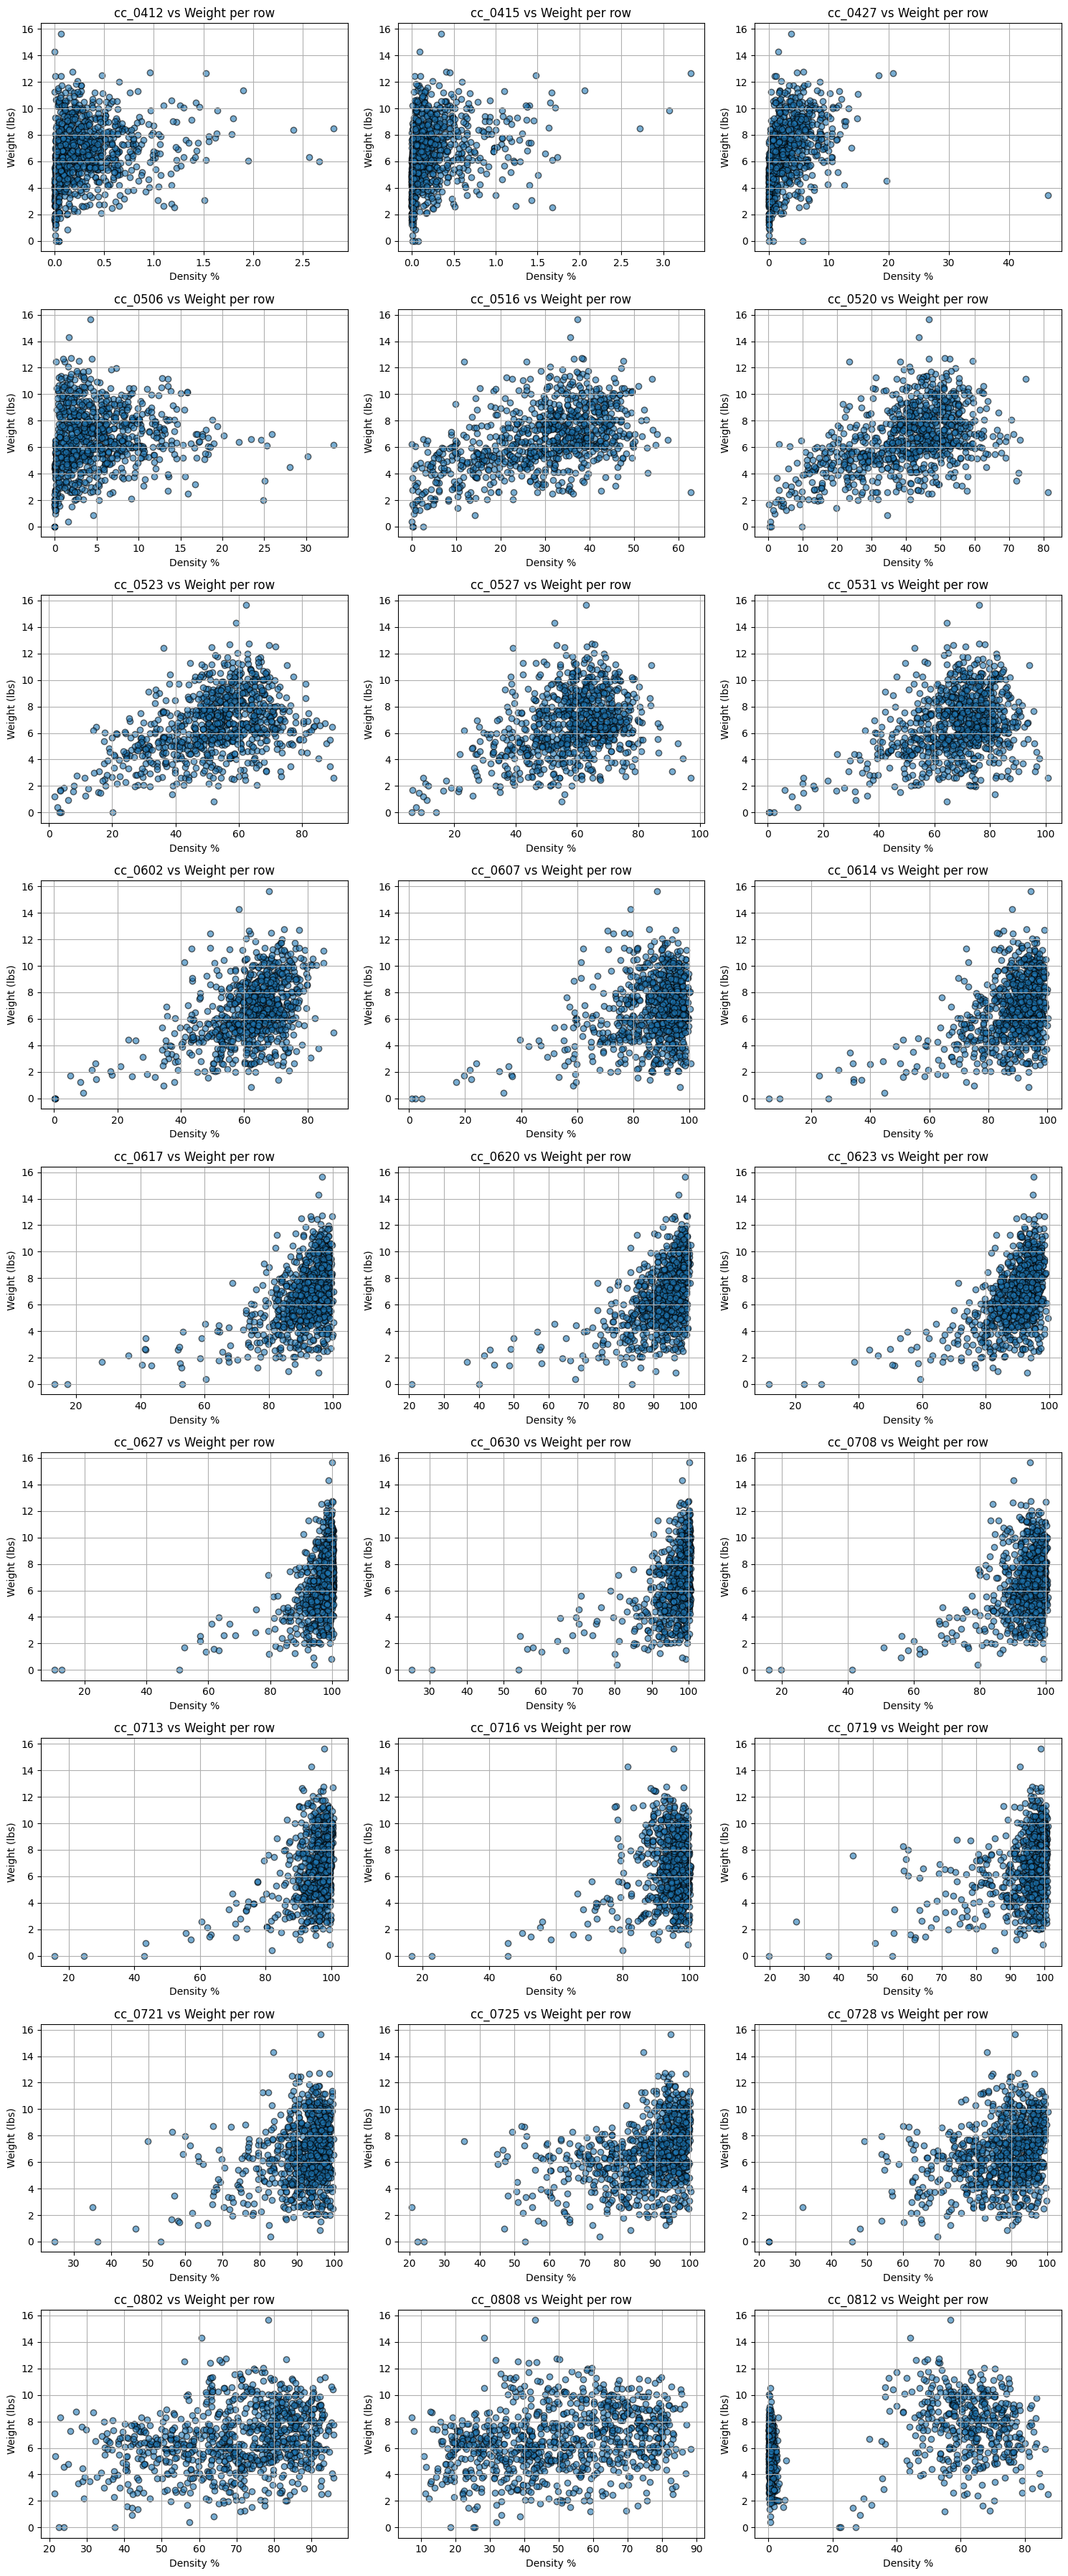

In [29]:
import matplotlib.pyplot as plt

# Define X and y using the cleaned DataFrame
X = df[[col for col in df.columns if col.startswith('cc_')]]
y = df['Weight per row (lbs)']

# Set how many plots per row
plots_per_row = 3
num_plots = X.shape[1]
num_rows = (num_plots + plots_per_row - 1) // plots_per_row

plt.figure(figsize=(plots_per_row * 5, num_rows * 4))

for i, col in enumerate(X.columns):
    plt.subplot(num_rows, plots_per_row, i + 1)
    plt.scatter(X[col], y, alpha=0.6, edgecolor='k')
    plt.title(f'{col} vs Weight per row')
    plt.xlabel('Density %')
    plt.ylabel('Weight (lbs)')
    plt.grid(True)

plt.tight_layout()
plt.show()

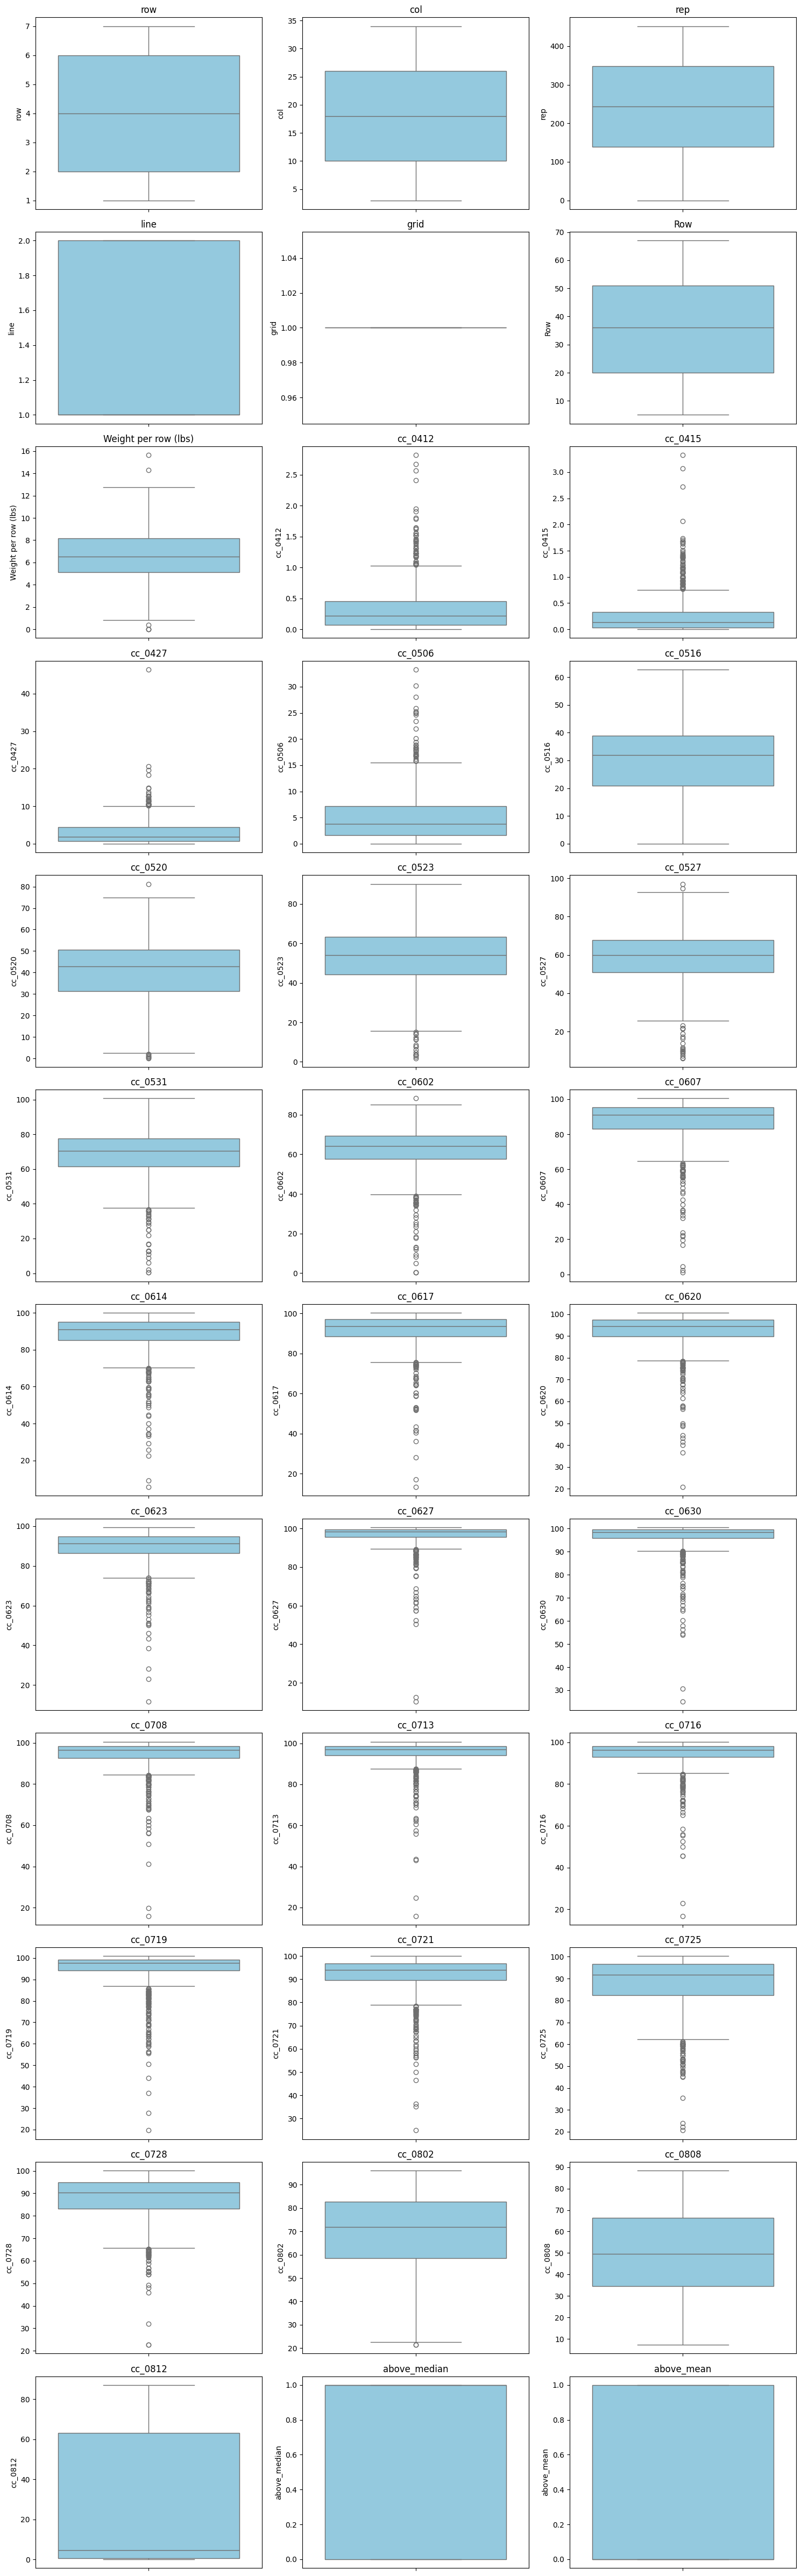

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select all numeric columns including yield
numeric_df = df.select_dtypes(include='number')

# Step 2: Set up the plot grid
num_cols = numeric_df.shape[1]
plots_per_row = 3
num_rows = (num_cols + plots_per_row - 1) // plots_per_row

plt.figure(figsize=(plots_per_row * 5, num_rows * 4))

# Step 3: Create individual boxplots
for i, col in enumerate(numeric_df.columns):
    plt.subplot(num_rows, plots_per_row, i + 1)
    sns.boxplot(y=numeric_df[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()


In [31]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df[[col for col in df.columns if col.startswith('cc_')]]
y = df['Weight per row (lbs)']

# First split: Train (75%) and Test (25%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Second split: Split train_val into actual train (2/3) and validation (1/3)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=1/3, random_state=42)

# Print shapes to confirm
print("Train set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)


Train set size: (437, 27)
Validation set size: (219, 27)
Test set size: (219, 27)


In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

best_k = None
best_val_mse = float('inf')
results = []

# Try different values of k
for k in range(1, 436):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on validation set
    y_val_pred = knn.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)

    results.append((k, mse, r2))

    # Keep best k
    if mse < best_val_mse:
        best_val_mse = mse
        best_k = k

print(f"Best k = {best_k} with Validation MSE = {best_val_mse:.3f}")


Best k = 13 with Validation MSE = 3.552


In [33]:
last_10_cols = X.columns[-10:]
X_last10 = X[last_10_cols]

# Redo the split with this new feature set
X_train_val, X_test, y_train_val, y_test = train_test_split(X_last10, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=1/3, random_state=42)


In [34]:
import joblib

# Re-train on full training + validation with best k
final_knn = KNeighborsRegressor(n_neighbors=best_k)
final_knn.fit(X_train_val, y_train_val)

# Save model to file
joblib.dump(final_knn, f'best_knn_model_k{best_k}.pkl')


['best_knn_model_k150.pkl']

In [35]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Predict on test set
y_test_pred = final_knn.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
corr = np.corrcoef(y_test, y_test_pred)[0, 1]

print("===== Final Model Evaluation (on Test Set) =====")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")
print(f"Correlation Coefficient (R): {corr:.3f}")


===== Final Model Evaluation (on Test Set) =====
Mean Squared Error (MSE): 3.917
Mean Absolute Error (MAE): 1.575
R-squared (R²): 0.346
Correlation Coefficient (R): 0.618


In [77]:
df.shape

(875, 28)

In [ ]:
df.isna().sum().sum()

17

In [ ]:
df = df.fillna(0)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.describe()

,row,col,rep,line,grid,Tier,Row,Weight per row (lbs),cc_0412,cc_0415,...,cc_0708,cc_0713,cc_0716,cc_0719,cc_0721,cc_0725,cc_0728,cc_0802,cc_0808,cc_0812
count,875.000000,875.00000,875.000000,875.00000,875.0,875.000000,875.00000,875.000000,875.000000,875.000000,...,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000
mean,4.000000,18.16800,257.161143,1.49600,1.0,4.000000,35.75200,6.619561,0.332185,0.264788,...,94.026807,95.082757,94.141212,94.638812,91.362719,87.619367,87.496111,69.590045,50.040269,31.333879
std,2.001144,9.08593,130.586830,0.50027,0.0,2.001144,18.05367,2.370967,0.373851,0.373185,...,8.284162,7.766256,8.112389,8.767108,9.020988,12.236083,10.622950,16.478898,19.321092,31.829060
min,1.000000,3.00000,0.000000,1.00000,1.0,1.000000,5.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,19.629574,0.000000,20.619689,0.000000,21.425299,7.274665,0.000000
25%,2.000000,10.00000,139.500000,1.00000,1.0,2.000000,20.00000,5.116000,0.068185,0.032228,...,92.682724,94.276348,92.987413,94.104234,89.548790,82.527814,82.931190,58.490996,34.502141,0.593581
50%,4.000000,18.00000,244.000000,1.00000,1.0,4.000000,36.00000,6.512000,0.219214,0.130703,...,96.434169,97.154009,96.320704,97.563821,93.963246,91.747341,90.380448,71.972726,49.725851,3.262512
75%,6.000000,26.00000,348.000000,2.00000,1.0,6.000000,51.00000,8.170000,0.454996,0.325862,...,98.311194,98.694683,98.233650,99.190037,96.680398,96.598134,94.804503,82.771715,66.348776,63.274470
max,7.000000,34.00000,452.000000,2.00000,1.0,7.000000,67.00000,15.650000,2.817913,3.326650,...,100.585191,100.833861,100.357273,100.874658,99.934271,100.283598,100.119823,96.028730,88.393048,87.125766


In [ ]:
# separating the data to X and y
X = df[['cc_0412', 'cc_0415', 'cc_0427', 'cc_0506', 'cc_0516', 'cc_0520', 'cc_0523', 'cc_0527', 'cc_0531', 'cc_0602',
       'cc_0607', 'cc_0614', 'cc_0617', 'cc_0620', 'cc_0623', 'cc_0627',
       'cc_0630', 'cc_0708', 'cc_0713', 'cc_0716', 'cc_0719', 'cc_0721',
       'cc_0725', 'cc_0728', 'cc_0802', 'cc_0808', 'cc_0812']]

y = df['Weight per row (lbs)']





In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [102]:
# modeling and training

In [103]:
reg = LinearRegression().fit(X_train, y_train)
y_hat = reg.predict(X_test)

In [104]:
reg.predict(X_train.iloc[:5, :])


array([3.79143443, 8.98907602, 7.47563302, 9.33156775, 7.47389174])

In [ ]:
y_train.iloc[:5]

172    5.680
850    7.316
103    8.280
785    8.604
691    5.684
Name: Weight per row (lbs), dtype: float64

In [ ]:
reg.score(X_train, y_train)

0.6619004514427427

In [ ]:
y_hat

array([ 9.53091854,  7.27430352,  6.26736405,  4.90542813,  5.41822429,
        4.44722934,  6.24911623,  6.37445049,  8.36465862,  3.11713102,
        6.60553924,  5.00474504,  2.97859526,  8.04486788,  4.8417803 ,
        7.35590948,  8.61713381,  5.26708732,  3.61857316,  4.58022859,
        3.19212314,  9.16917464,  7.69516147,  4.98107738,  7.10325649,
        7.41478622,  6.19055758,  6.36540649,  9.45244763,  4.08862313,
        7.36863739,  5.89728316,  6.63431199,  3.41575012,  6.2505571 ,
        8.01665752,  5.24332681,  8.54720448,  8.50978079,  9.09718797,
        6.97524865,  7.75861145,  4.16886214,  9.27170348,  7.58273983,
        6.22964172,  8.10622289,  7.76449523,  7.56923425,  7.28658985,
        3.16726044,  8.22698588,  6.40388031,  6.49188562,  6.67437469,
        6.0730918 ,  7.87385003,  6.21211031,  4.63173582,  8.94749697,
        7.17348881,  9.07637619,  7.23170787,  6.42602324,  5.44581566,
        5.86019193,  8.89298612,  9.96097705,  7.30113124,  7.79

In [ ]:
# evaluation

In [ ]:
reg.score(X_test, y_test)

0.5155039801869563